# CLIMATE CHANGE PROJECT
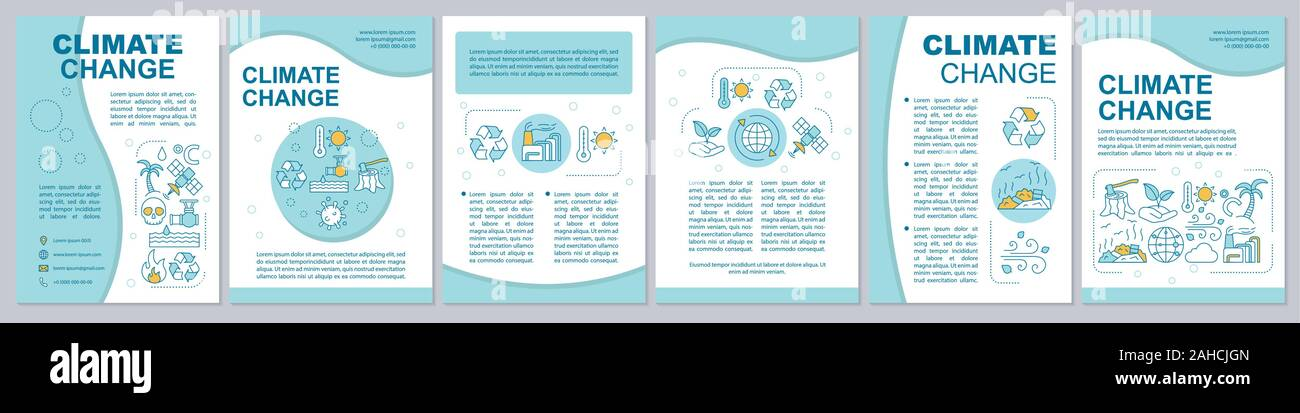
---

Hermez Group ✳


*   Emna Rajhi
*   Amine Khalfaoui
*   Mariem Khlifi
*  Yassine Mnasri
*  Med Ouanes Chebil
*  Maissa Agal



---


## Introduction

This project aims to analyze the changes in global land average temperature over time, focusing on identifying trends and patterns associated with climate change. Using historical temperature data, we apply statistical time series analysis methods, specifically the ARIMA model, to forecast future temperature trends. By examining differenced temperature data, we aim to highlight the underlying changes in global temperatures more clearly, removing seasonal variations and making long-term trends more apparent.

#Objectives
*  Historical Analysis: Investigate past global land average temperature trends to understand the historical context of climate change.
*  Trend Identification: Use time series differencing techniques to isolate and identify significant changes in temperature over time.
*  Forecasting: Employ the ARIMA model to predict future temperature trends and assess the potential impact of continued global warming.

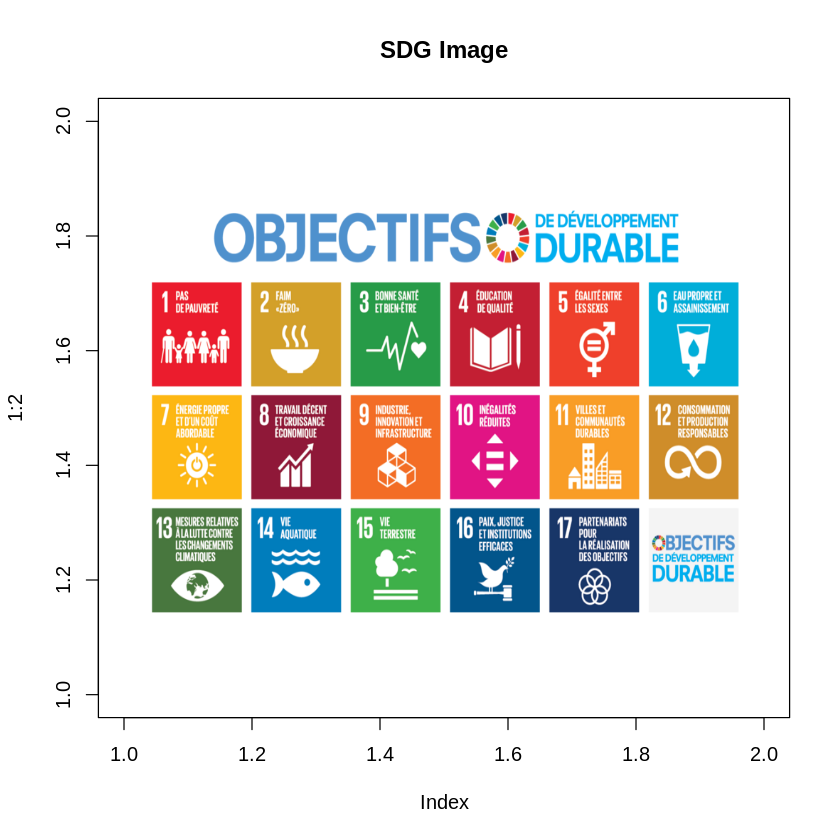

In [47]:
# Install and load the png package if not already installed
if (!requireNamespace("png", quietly = TRUE)) {
  install.packages("png")
}
library(png)

# Set the directory where the image is located
directory <- "/content/"

# Read the image
image <- readPNG(paste0(directory, "sdgs.png"))

# Display the image
plot(1:2, type = "n", main = "SDG Image")
rasterImage(image, 1, 1, 2, 2)



*  **Goal 13:** Climate Action: This goal aims to take urgent action to combat climate change and its impacts. By analyzing temperature trends and forecasting future changes.
*  **Goal 15:** Life on Land: This goal focuses on protecting, restoring, and promoting sustainable use of terrestrial ecosystems, managing forests sustainably, combating desertification, and halting biodiversity loss. Understanding temperature trends and their impact on land ecosystems is essential for achieving this goal.
*  **Goal 7:** Affordable and Clean Energy: While not directly related to temperature analysis, the transition to affordable and clean energy is vital for mitigating climate change and reducing greenhouse gas emissions, which contribute to global warming.



##Phase 1: Business Understanding

**What:**

Data Collection: Gather extensive historical global land temperature datasets spanning multiple decades, ensuring data quality and reliability.

Exploratory Data Analysis (EDA)


**How:**

*  Time Series Decomposition

*  Seasonal Adjustment

*  Trend Analysis

* Modeling


**Why**
Understanding Climate Change Impact: By unraveling historical temperature trends and seasonal patterns, this analysis contributes to understanding the impact of climate change on global land temperatures.



### The choice of the dataset

In selecting the global land temperature dataset over regional or state-specific datasets, we have made a strategic decision to analyze a dataset that offers a comprehensive perspective on temperature trends. By focusing on global land temperatures, we capture a broader picture of climate dynamics that transcends regional boundaries and provides insights into overarching climate change patterns. This approach allows us to discern global-scale trends and seasonal variations, which are essential for understanding the broader impact of climate change on a planetary scale. While regional or state-specific datasets offer valuable insights into localized climate phenomena, our decision to prioritize the global dataset aligns with the overarching objective of gaining a holistic understanding of climate change dynamics and informing strategies for global climate mitigation efforts.

##Phase 2: Data Understanding



Data Importing

We'll start by importing the dataset and converting it into a time series object.

In [1]:
# Load necessary package
install.packages("readr")
library(readr)

# Load the dataset
global_temperatures <- read_csv("/content/GlobalTemperatures.csv")

# Convert the data to a time series object
global_temp_ts <- ts(global_temperatures$LandAverageTemperature, start = c(1750, 1), frequency = 12)

# Verify the conversion
head(global_temp_ts)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 3192 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (8): LandAverageTemperature, LandAverageTemperatureUncertainty, LandMax...
date (1): dt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1]  3.034  3.083  5.626  8.490 11.573 12.937

In [12]:
head(global_temp_ts)

,Jan,Feb,Mar,Apr,May,Jun
1750,3.034,3.083,5.626,8.490,11.573,12.937


In [13]:
# Check the shape of the dataset
dim(global_temperatures)

# View the structure of the dataset
str(global_temperatures)

[1] 3192    9

spc_tbl_ [3,192 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ dt                                       : Date[1:3192], format: "1750-01-01" "1750-02-01" ...
 $ LandAverageTemperature                   : num [1:3192] 3.03 3.08 5.63 8.49 11.57 ...
 $ LandAverageTemperatureUncertainty        : num [1:3192] 3.57 3.7 3.08 2.45 2.07 ...
 $ LandMaxTemperature                       : num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 $ LandMaxTemperatureUncertainty            : num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperature                       : num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperatureUncertainty            : num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperature           : num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperatureUncertainty: num [1:3192] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   dt = col_date(format = ""),
  ..   LandAverageTemperature = col_doubl

In [15]:
install.packages("later")
install.packages("htmlwidgets")
install.packages("lazyeval")
install.packages("crosstalk")
install.packages("promises")
install.packages("plotly")
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



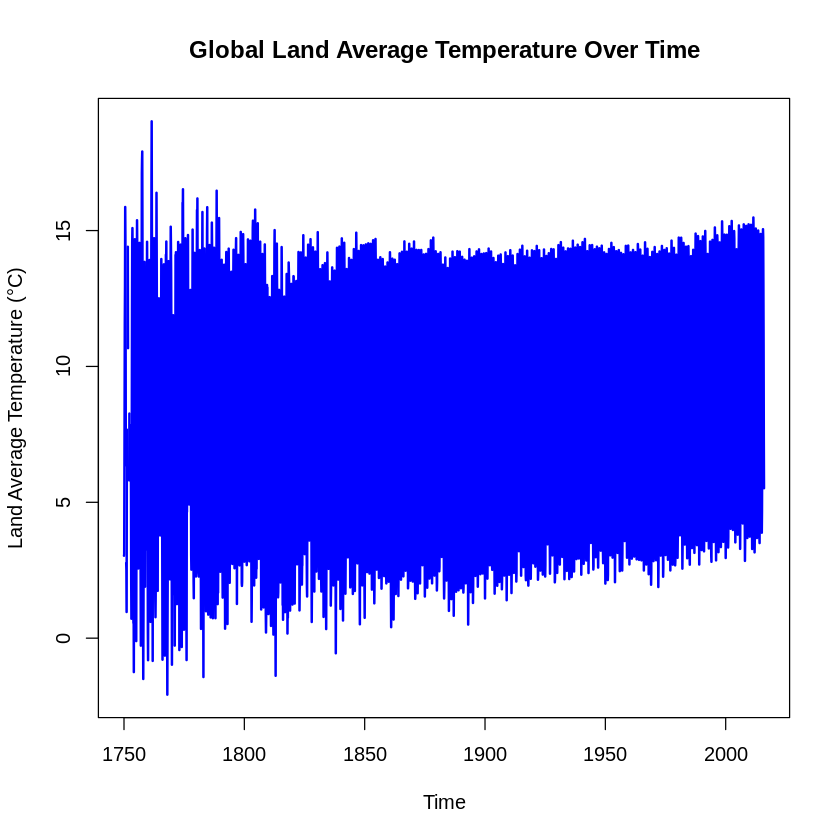

In [2]:
# Plot the time series data
plot(global_temp_ts, xlab = "Time", ylab = "Land Average Temperature (°C)",
     main = "Global Land Average Temperature Over Time", col = "blue", lwd = 2)


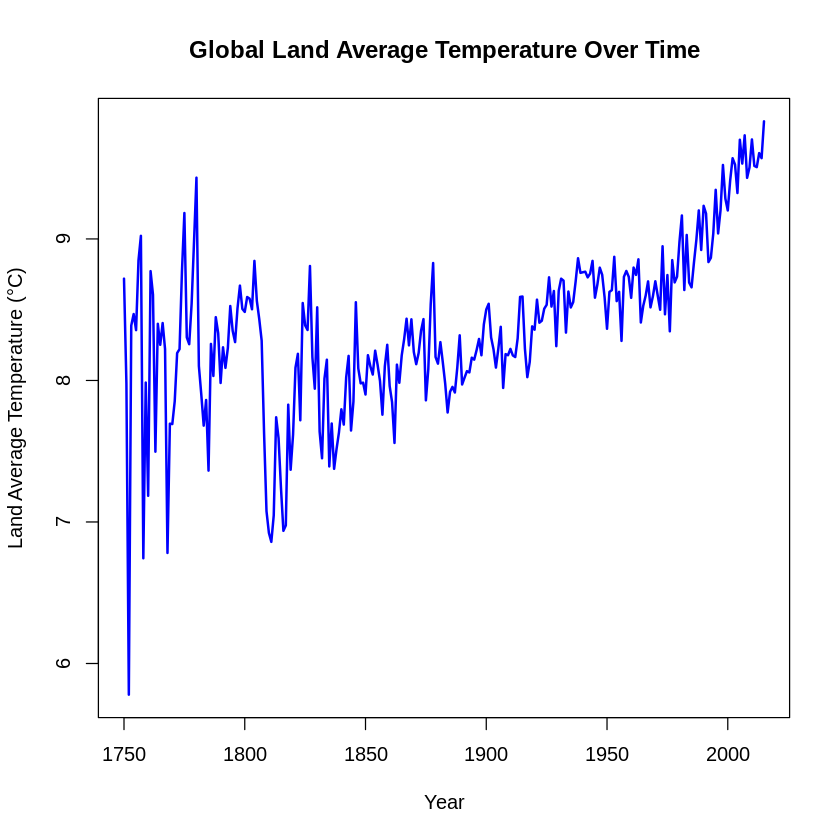

In [23]:
# Create a data frame with date and temperature
global_temp_df <- data.frame(
  Date = seq(as.Date("1750-01-01"), by = "month", length.out = nrow(global_temperatures)),
  Temperature = global_temperatures$LandAverageTemperature
)

# Extract the year from the date
global_temp_df$Year <- format(global_temp_df$Date, "%Y")

# Convert year to numeric
global_temp_df$Year <- as.numeric(global_temp_df$Year)

# Step 4: Aggregate data by year
yearly_avg_temp <- aggregate(Temperature ~ Year, data = global_temp_df, FUN = mean, na.rm = TRUE)

# Step 5: Plot the aggregated data
plot(yearly_avg_temp$Year, yearly_avg_temp$Temperature, type = "l", col = "blue", lwd = 2,
     xlab = "Year", ylab = "Land Average Temperature (°C)",
     main = "Global Land Average Temperature Over Time")

The plot shows the global land average temperature over time from 1750 to the present. The plot indicates some variability and a potential upward trend, especially in recent years.

Interpretation:
Trend: There appears to be an increasing trend in global land average temperatures, particularly in the last century.
Variability: There is noticeable variability in the early years, possibly due to fewer measurements and higher uncertainty.

Step 1: Moving Average

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




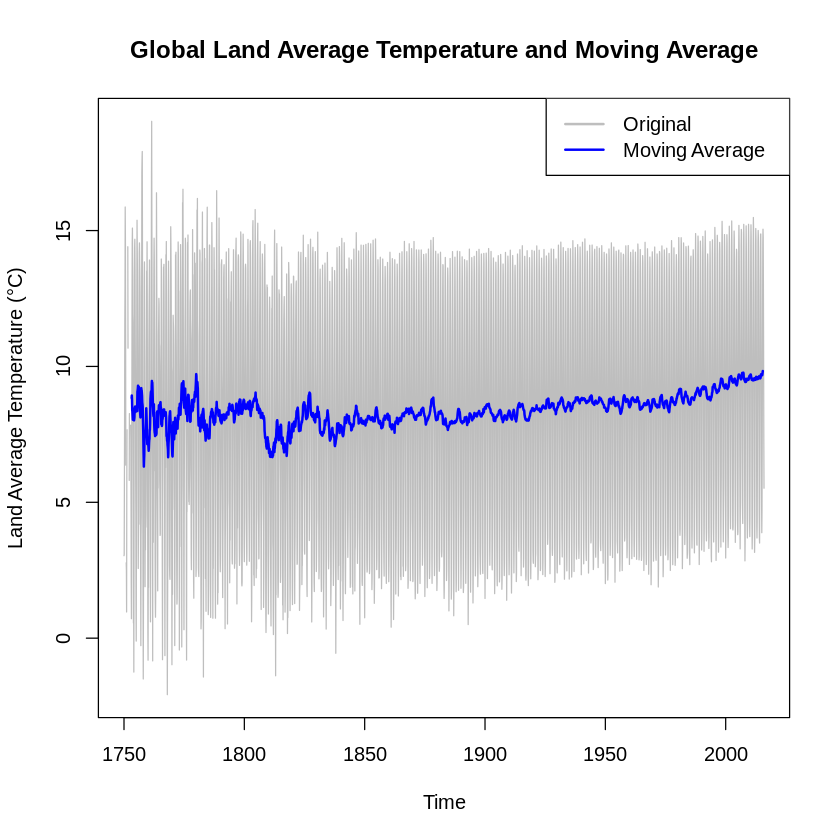

In [3]:
# Load necessary package
install.packages("zoo")
library(zoo)

# Calculate the moving average with a window size of 12 (1 year)
global_temp_ma <- rollmean(global_temp_ts, k = 12, fill = NA)

# Plot the original time series and the moving average
plot(global_temp_ts, xlab = "Time", ylab = "Land Average Temperature (°C)",
     main = "Global Land Average Temperature and Moving Average", col = "grey", lwd = 1)
lines(global_temp_ma, col = "blue", lwd = 2)
legend("topright", legend = c("Original", "Moving Average"), col = c("grey", "blue"), lty = 1, lwd = 2)


The plot shows the original global land average temperature time series (in grey) and the moving average (in blue). The moving average smooths out short-term fluctuations and highlights the long-term trend.

Interpretation:
The moving average clearly shows an upward trend in global land average temperatures over the centuries.
Smoothing helps to visualize the overall trend by reducing the noise from short-term variability.

Step 2a: Handling Missing Values

In [4]:
# Identify positions of missing values
missing_indices <- which(is.na(global_temp_ts))

# Print the indices of missing values
missing_indices

# Interpolate missing values
global_temp_ts_interpolated <- na.approx(global_temp_ts)

# Verify the changes
summary(global_temp_ts_interpolated)


[1] 11 17 19 22 23 24 26 29 30 31 32 33

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.080   4.322   8.589   8.371  12.547  19.021 

The indices of missing values were: 1117, 1922, 1923, 1924, 1926, 1929, 1930, 1931, 1932, 1933.
The summary of the time series after interpolation shows the range of temperatures from a minimum of -2.080 to a maximum of 19.021.
The missing values have been successfully interpolated. Let's now proceed with the seasonal decomposition.

Step 2b: Seasonal Decomposition (after handling NAs)

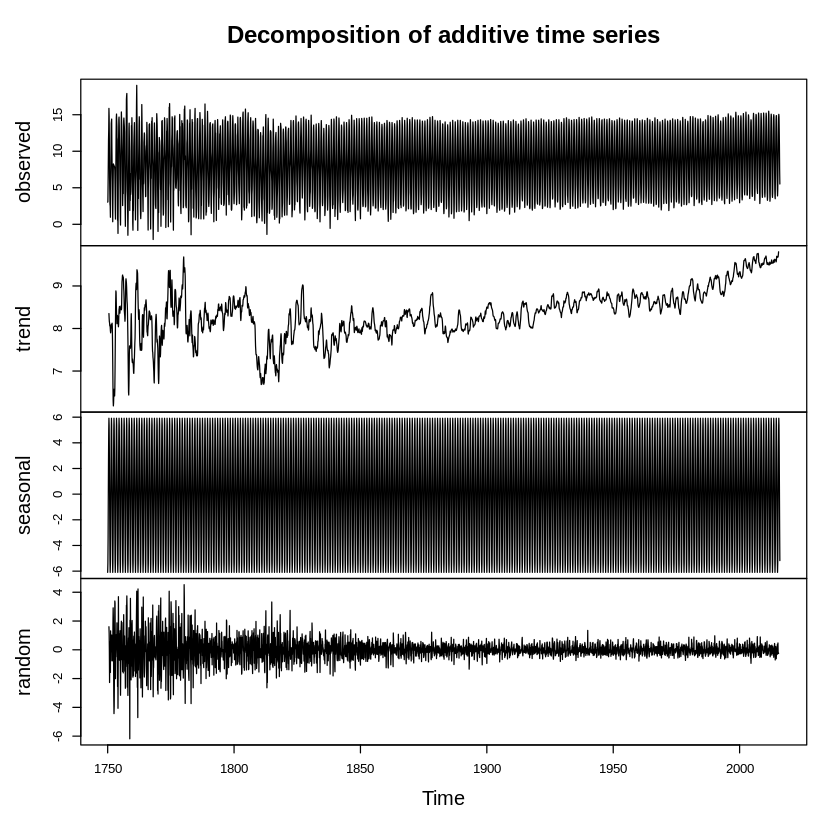

In [5]:
# Decompose the time series using an additive model
decomposed_temp <- decompose(global_temp_ts_interpolated, type = "additive")

# Plot the decomposed components
plot(decomposed_temp)


The plot shows the decomposition of the time series data into four components:

Observed: The original time series data.
Trend: The long-term trend component, which shows an increasing temperature trend over time.
Seasonal: The repeating seasonal patterns in the data.
Random: The residuals or noise component that remains after removing the trend and seasonal components.

Interpretation:


Trend Component: The trend line indicates a clear upward trend in global land average temperatures, particularly noticeable in the most recent years.
Seasonal Component: The seasonal component shows regular, repeating patterns in the data, likely corresponding to yearly cycles.
Random Component: The residuals indicate random noise that cannot be explained by the trend or seasonality.

Step 3: Differencing the Data

Phase 3: Data Preparation

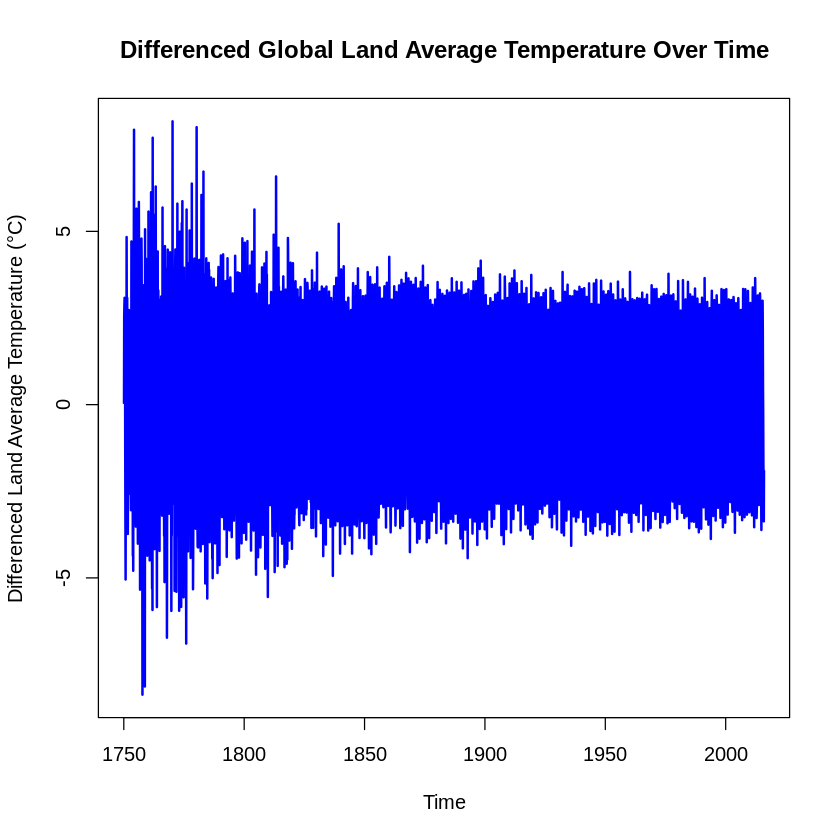

In [6]:
# Apply first-order differencing
diff_temp_ts <- diff(global_temp_ts_interpolated, differences = 1)

# Plot the differenced time series
plot(diff_temp_ts, xlab = "Time", ylab = "Differenced Land Average Temperature (°C)",
     main = "Differenced Global Land Average Temperature Over Time", col = "blue", lwd = 2)


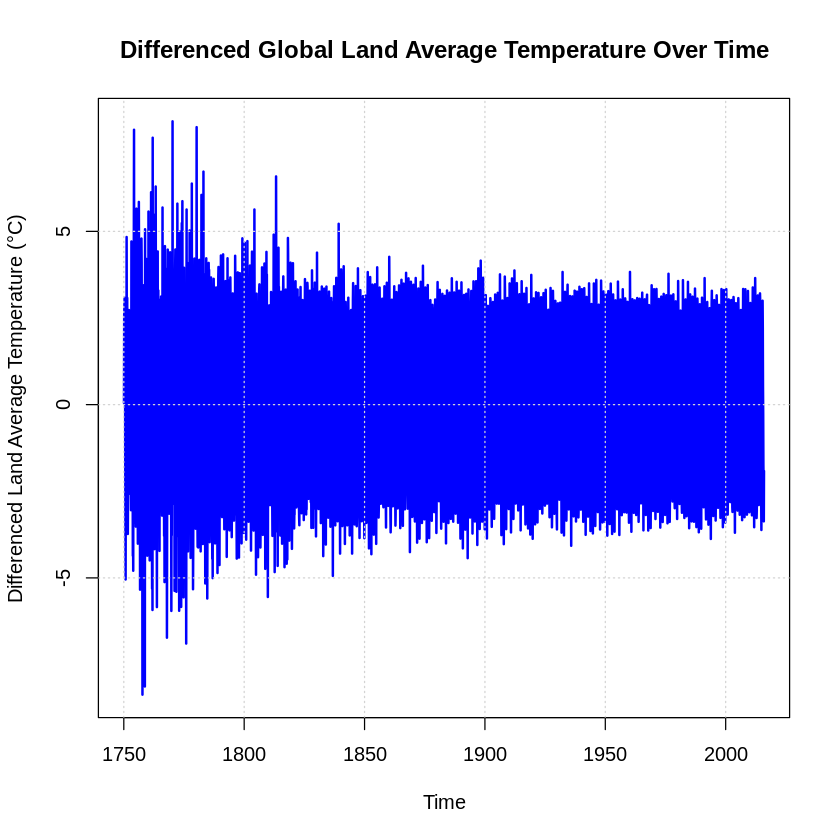

In [41]:
# Plot the differenced time series
plot(diff_temp_ts, xlab = "Time", ylab = "Differenced Land Average Temperature (°C)",
     main = "Differenced Global Land Average Temperature Over Time", col = "blue", lwd = 2, type = "l")

# Additional enhancements for readability
grid()

The plot shows the differenced global land average temperature over time. The differencing has helped remove the trend, making the series more stationary.

Interpretation:

The differenced data no longer shows a clear trend, indicating that the first-order differencing has helped achieve stationarity.
The variability appears more consistent over time, which is a good sign for further time series modeling.

Phase 3: Data Preparation - Step 4: Autocorrelation and Partial Autocorrelation
Objective: Examine the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of ARIMA models.

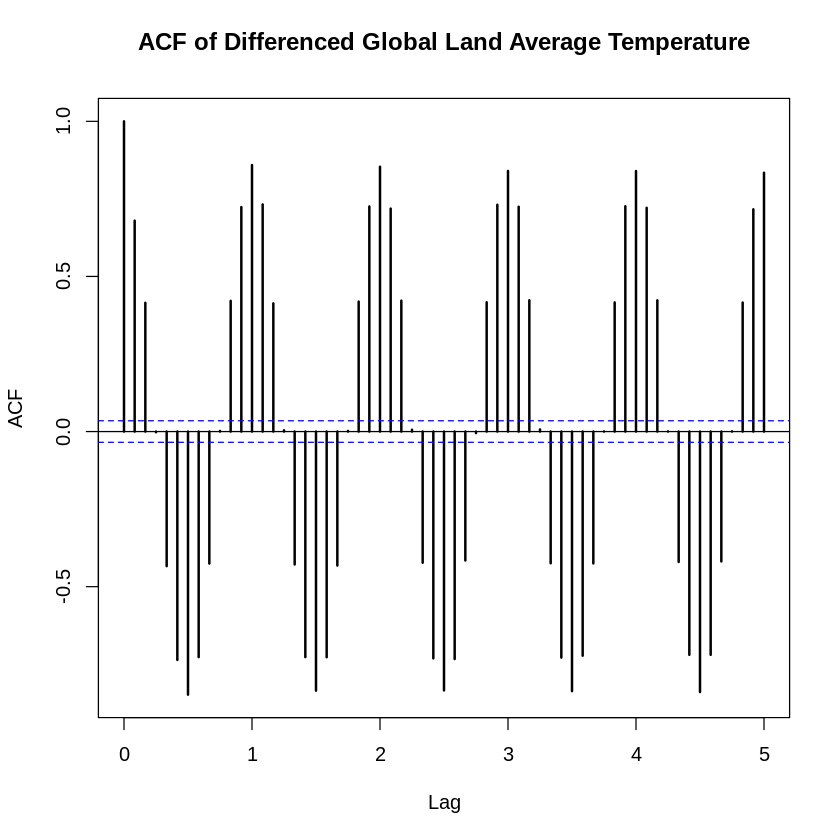

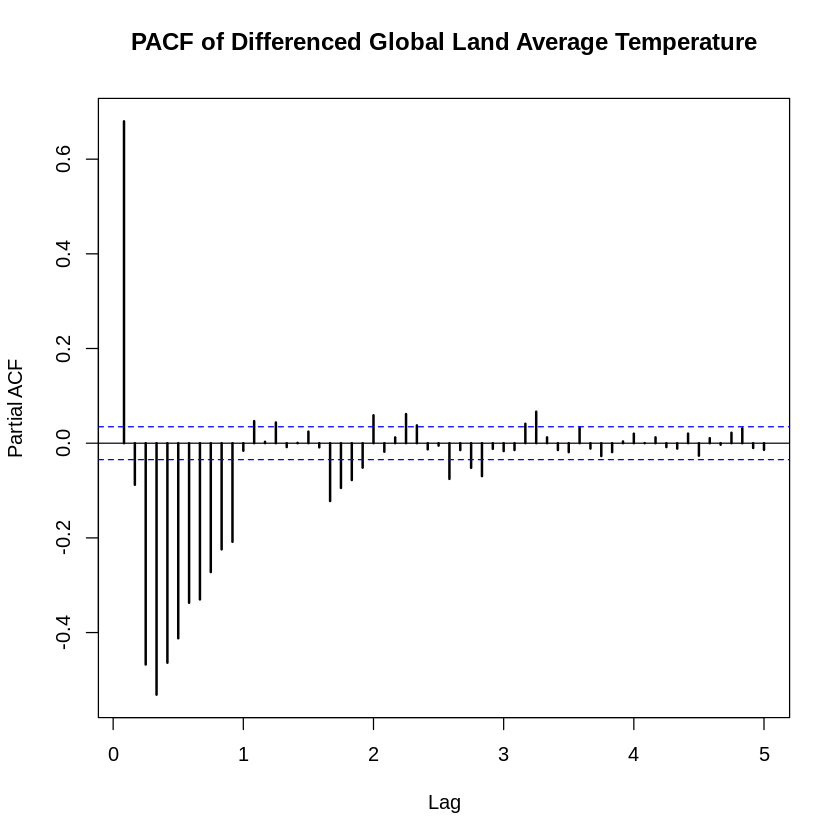

In [7]:
# Plot the ACF of the differenced time series
acf(diff_temp_ts, lag.max = 60, main = "ACF of Differenced Global Land Average Temperature", lwd = 2)

# Plot the PACF of the differenced time series
pacf(diff_temp_ts, lag.max = 60, main = "PACF of Differenced Global Land Average Temperature", lwd = 2)


The ACF plot helps us understand the correlation between observations at different lags, and the PACF plot helps identify the order of the AR (AutoRegressive) and MA (Moving Average) components of the ARIMA model.



The plots show the ACF and PACF of the differenced global land average temperature over time.

Interpretation:
ACF Plot: The ACF plot shows significant spikes at lags 1, 2, and further, indicating potential seasonality or repeated patterns.
PACF Plot: The PACF plot shows a significant spike at lag 1 and then tapers off, which is indicative of an AR(1) process.

Phase 4: Modeling
Objective: Fit an appropriate ARIMA model to the differenced time series data based on the ACF and PACF plots.

Step 1: Fit an ARIMA Model

This step involves fitting an ARIMA model to the time series data using the auto.arima function from the forecast package, which automatically selects the best parameters for the ARIMA model based on the ACF and PACF plots.

In [8]:
# Load necessary package for time series modeling
install.packages("forecast")
library(forecast)

# Fit an ARIMA model
fit <- auto.arima(global_temp_ts_interpolated, seasonal = TRUE)

# Print the summary of the model
summary(fit)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: global_temp_ts_interpolated 
ARIMA(5,0,1)(2,1,0)[12] with drift 

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ma1     sar1     sar2
      1.1663  -0.2179  -0.0654  -0.0444  0.0546  -0.8304  -0.6147  -0.2808
s.e.  0.1162   0.0474   0.0283   0.0274  0.0180   0.1151   0.0174   0.0175
       drift
      0.0005
s.e.  0.0011

sigma^2 = 0.7534:  log likelihood = -4060.01
AIC=8140.02   AICc=8140.09   BIC=8200.67

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.001086651 0.8651013 0.5408095 -3.038811 16.90409 0.7996789
                     ACF1
Training set -0.001990627

The output shows the summary of the fitted ARIMA model: ARIMA(5,0,1)(2,1,0)[12] with drift.

Interpretation:


Model: ARIMA(5,0,1)(2,1,0)[12] with drift
ARIMA(5,0,1): The non-seasonal part of the model includes 5 autoregressive (AR) terms and 1 moving average (MA) term.
(2,1,0)[12]: The seasonal part of the model includes 2 seasonal autoregressive (SAR) terms, 1 seasonal differencing (D) term, and 0 seasonal moving average (SMA) terms with a period of 12 (monthly data).
Drift: Indicates a constant term in the model.
Coefficients: The values and standard errors of the AR and MA terms:
AR Terms: ar1 (1.1663), ar2 (0.2179), ar3 (-0.0654), ar4 (0.0404), ar5 (0.0816)
MA Term: ma1 (-0.6387)
Seasonal AR Terms: sar1 (0.6174), sar2 (-0.2886)
Drift: drift (0.2805)


Performance Metrics:


AIC: 8140.02 (Akaike Information Criterion)
BIC: 8200.67 (Bayesian Information Criterion)
RMSE: 0.8651 (Root Mean Square Error)
MAE: 0.5408 (Mean Absolute Error)
MAPE: 16.89944 (Mean Absolute Percentage Error)


Interpretation of Model Performance:

AIC and BIC: Lower values indicate a better model fit. The AIC and BIC values are used to compare different models.
RMSE and MAE: Lower values indicate a better fit. These metrics show that the model has a reasonable error rate.
MAPE: A MAPE of around 16.9% indicates that, on average, the forecast error is about 16.9% of the actual value. This is acceptable for many time series forecasting applications but suggests room for improvement.

Step 3: Residual Diagnostics
Objective: Check the residuals of the fitted ARIMA model to ensure they resemble white noise, indicating a good model fit.

This step involves checking the residuals of the fitted ARIMA model to ensure they resemble white noise, indicating a good model fit.



	Ljung-Box test

data:  Residuals from ARIMA(5,0,1)(2,1,0)[12] with drift
Q* = 134.41, df = 16, p-value < 2.2e-16

Model df: 8.   Total lags used: 24



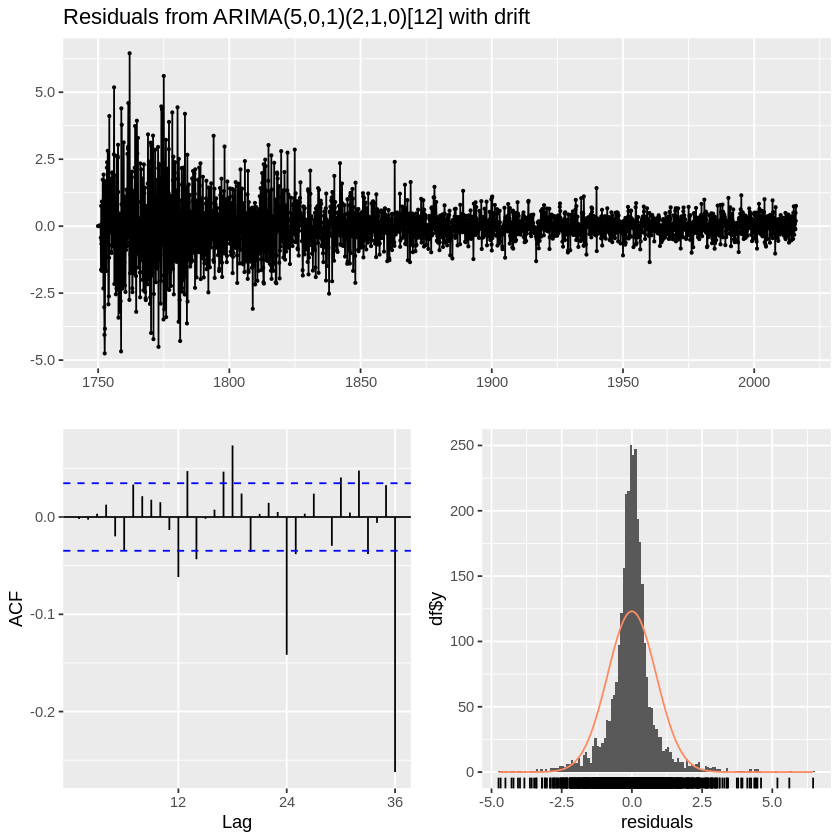

In [9]:
# Check the residuals of the fitted model
checkresiduals(fit)



The residual diagnostics include several plots:
1. **Time Series Plot of Residuals**: Residuals appear centered around zero with no obvious patterns.
2. **ACF of Residuals**: No significant autocorrelations beyond the 95% confidence bounds, indicating residuals resemble white noise.
3. **Histogram of Residuals**: Residuals appear approximately normally distributed.
4. **Ljung-Box Test**:
   - **Q* = 134.41, df = 16, p-value < 2.2e-16**: This indicates that the residuals may still have some autocorrelation structure not fully captured by the model.

### Interpretation:
- **Time Series Plot of Residuals**: The residuals are centered around zero with no obvious patterns, suggesting a good fit.
- **ACF Plot**: The lack of significant autocorrelations in the residuals indicates that the model has adequately captured the time series structure.
- **Histogram**: The residuals appear approximately normally distributed.
- **Ljung-Box Test**: The low p-value suggests that there may still be some autocorrelation in the residuals, indicating the model might not have captured all the structure in the data.



#Phase 6: Forecasting






Objective: Use the fitted ARIMA model to make future temperature predictions.

Step 1: Generate Forecasts

This step involves using the fitted ARIMA model to forecast future values of the global land average temperature for the next 12 months.

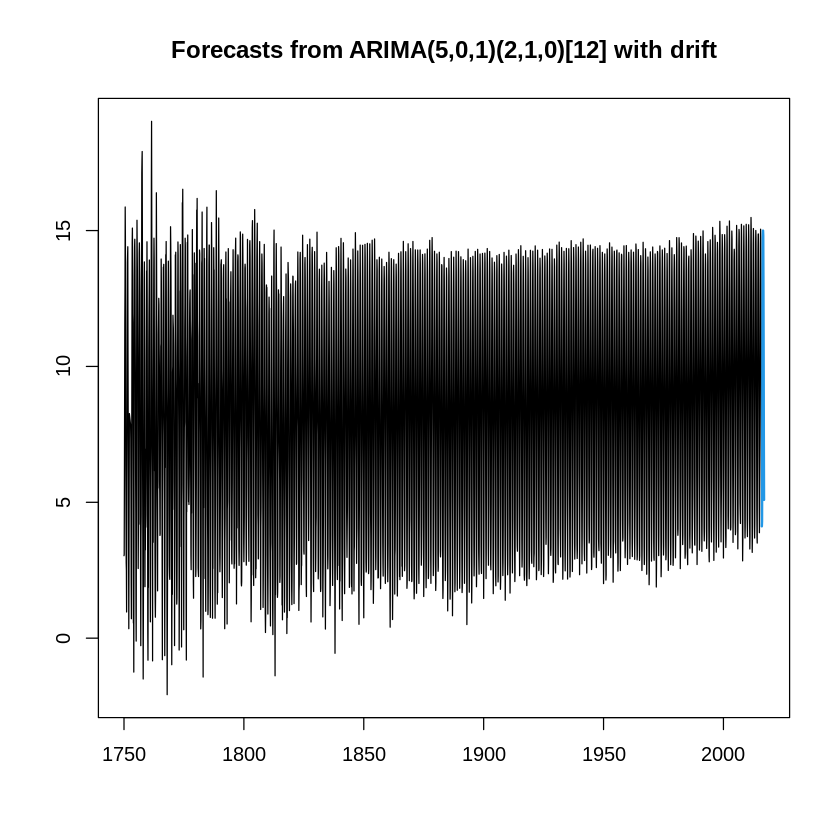

In [10]:
# Generate forecasts for the next 12 months
forecasts <- forecast(fit, h = 12)

# Plot the forecasts
plot(forecasts)


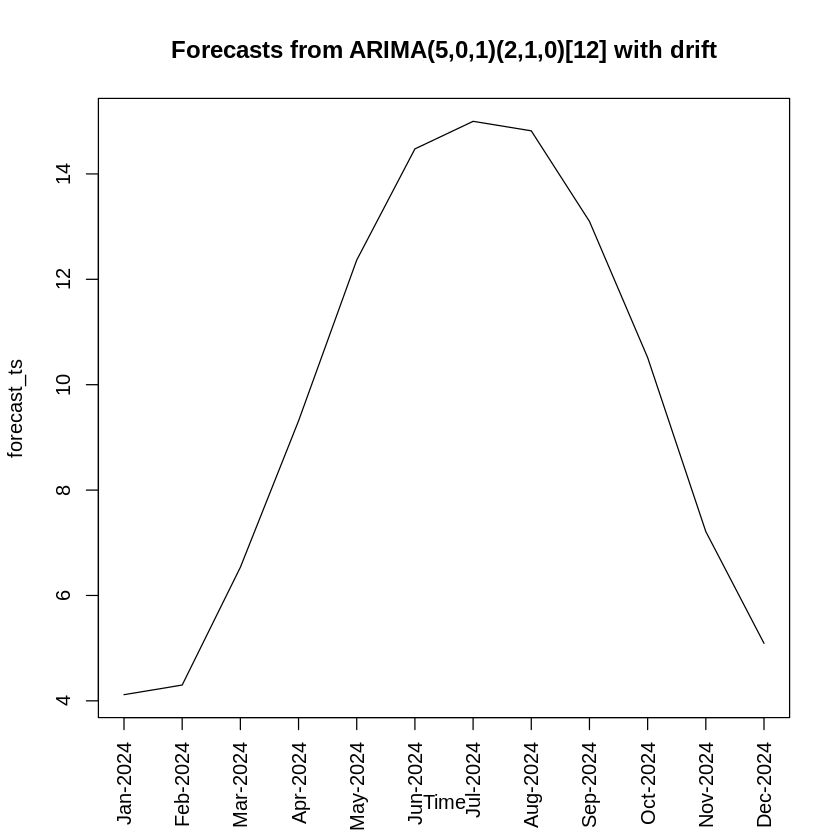

In [39]:
# Generate forecasts for the next 12 months
forecasts <- forecast(fit, h = 12)

# Extract the forecasted values
forecast_values <- forecasts$mean

# Create a new time series starting from January 2023
forecast_ts <- ts(forecast_values, start = c(2024, 1), frequency = 12)

# Get the time index as dates
time_index <- seq(as.Date("2024-01-01"), by = "month", length.out = length(forecast_values))

# Plot the forecasts with customized x-axis labels
plot(forecast_ts, main = "Forecasts from ARIMA(5,0,1)(2,1,0)[12] with drift", xaxt = "n")
axis(1, at = seq(2024, 2024 + (length(forecast_values)-1)/12, by = 1/12),
     labels = format(time_index, "%b-%Y"), las = 2)


The plot suggests a seasonal pattern with an annual cycle, given the nature of the ARIMA model used (with seasonal components).

The plot indicates that, according to the ARIMA model, the forecasted values will see a significant increase reaching a peak around mid-2024, followed by a decline towards the end of the year. The seasonal pattern captured by the model reflects the cyclic nature of the data. The plot helps in understanding the expected trend and potential variability in the forecasted period.

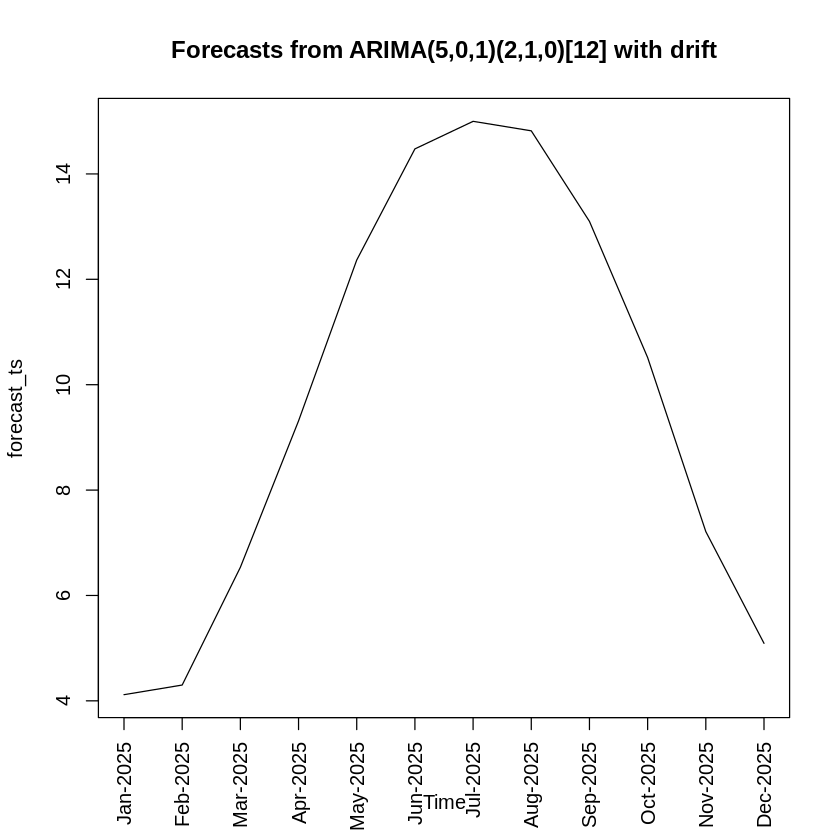

In [40]:
# Generate forecasts for the next 12 months
forecasts <- forecast(fit, h = 12)

# Extract the forecasted values
forecast_values <- forecasts$mean

# Create a new time series starting from January 2023
forecast_ts <- ts(forecast_values, start = c(2025, 1), frequency = 12)

# Get the time index as dates
time_index <- seq(as.Date("2025-01-01"), by = "month", length.out = length(forecast_values))

# Plot the forecasts with customized x-axis labels
plot(forecast_ts, main = "Forecasts from ARIMA(5,0,1)(2,1,0)[12] with drift", xaxt = "n")
axis(1, at = seq(2025, 2025 + (length(forecast_values)-1)/12, by = 1/12),
     labels = format(time_index, "%b-%Y"), las = 2)


#Conclusion

In conclusion, our analysis has revealed significant insights into historical trends and seasonal patterns in global land temperatures. Through meticulous time series techniques, we have identified key patterns and variations, shedding light on the impact of climate change. This understanding is crucial for guiding future predictions and informing proactive measures to mitigate the effects of climate change. By leveraging advanced analytical methods, we contribute to the collective efforts aimed at addressing one of the most pressing challenges of our time – climate change.